### Movie suggestion based on most similar Movies

#### Importing Libraries

In [72]:
import pandas as pd
import numpy as np

#### Loading Data

In [73]:
column_names = ['user_id' , 'item_id' , 'rating','timestamp']
df = pd.read_csv('user_tem_rating.data',sep='\t', names = column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [74]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [75]:
# Merging the two datasets
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


#### Exploratory Data Analysis

In [76]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Checking for best rated movie
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [78]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [79]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

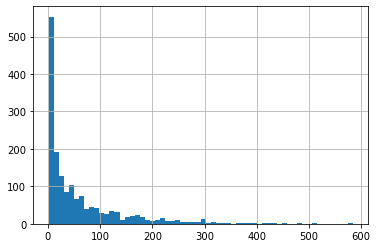

In [80]:
ratings['number of ratings'].hist(bins = 60)

<AxesSubplot:>

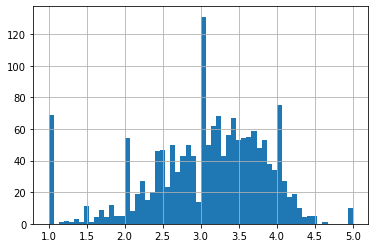

In [81]:
ratings['rating'].hist(bins = 60)

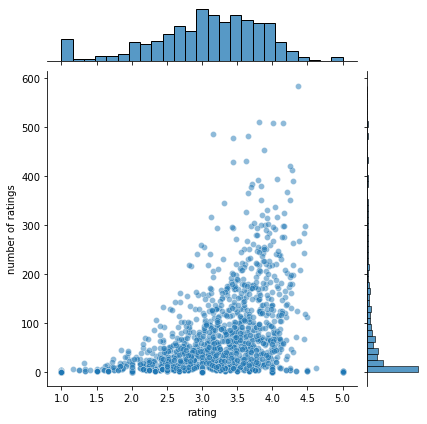

In [82]:
# Relationship between average rating and actual rating
# more rating more popular more number of viewers
sns.jointplot(x='rating' , y ='number of ratings' , data = ratings , alpha = 0.5)

### Building recommender system

In [83]:
movie_matrix = df.pivot_table(index = 'user_id', columns = 'title' , values= 'rating' )
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
ratings.sort_values('number of ratings' , ascending = False)

,rating,number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [85]:
starwars_user = movie_matrix['Star Wars (1977)']
movies_similar_to_starwars = movie_matrix.corrwith(starwars_user)
movies_corrwith_starwars = pd.DataFrame(movies_similar_to_starwars , columns = ['Correlation'])
movies_corrwith_starwars.dropna(inplace = True)
movies_corrwith_starwars =movies_corrwith_starwars.join(ratings['number of ratings'])
movies_corrwith_starwars[movies_corrwith_starwars['number of ratings'] > 50].sort_values('Correlation',ascending=False).head()


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Giant (1956),0.488093,51


In [87]:
Fargo_user = movie_matrix['Fargo (1996)']
movies_similar_to_Fargo = movie_matrix.corrwith(Fargo_user)
movies_corrwith_Fargo = pd.DataFrame(movies_similar_to_Fargo,columns=['Correlation'])
movies_corrwith_Fargo.dropna(inplace=True)
movies_corrwith_Fargo = movies_corrwith_Fargo.join(ratings['number of ratings'])
movies_corrwith_Fargo[movies_corrwith_Fargo['number of ratings'] > 50].sort_values('Correlation',ascending=False).head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,number of ratings
title,,
Fargo (1996),1.000000,508
Eve's Bayou (1997),0.658512,64
"MatchMaker, The (1997)",0.605783,51
To Die For (1995),0.551740,87
Bullets Over Broadway (1994),0.491990,86
